In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [ ]:

# Load data (sample data structure)
# data = pd.read_csv('ecommerce_data.csv')
# Assuming the data has columns like 'customer_id', 'age', 'annual_income', 'spending_score', 'purchase_history'

# Step 1: Data Preprocessing
# Sample customer data structure
data = pd.DataFrame({
    'customer_id': range(1, 11),
    'age': [23, 25, 31, 45, 22, 35, 42, 21, 33, 30],
    'annual_income': [15000, 30000, 25000, 50000, 20000, 45000, 42000, 19000, 37000, 32000],
    'spending_score': [75, 55, 60, 80, 50, 85, 78, 60, 68, 75],
    'purchase_history': [12, 23, 19, 34, 20, 33, 25, 18, 21, 22]
})



In [ ]:
# Normalize relevant numerical columns
scaler = StandardScaler()
data[['age', 'annual_income', 'spending_score', 'purchase_history']] = scaler.fit_transform(data[['age', 'annual_income', 'spending_score', 'purchase_history']])

# Step 2: Customer Segmentation with K-Means Clustering
# Finding the optimal number of clusters using the Elbow method
inertia = []
silhouette = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[['annual_income', 'spending_score']])
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data[['annual_income', 'spending_score']], kmeans.labels_))



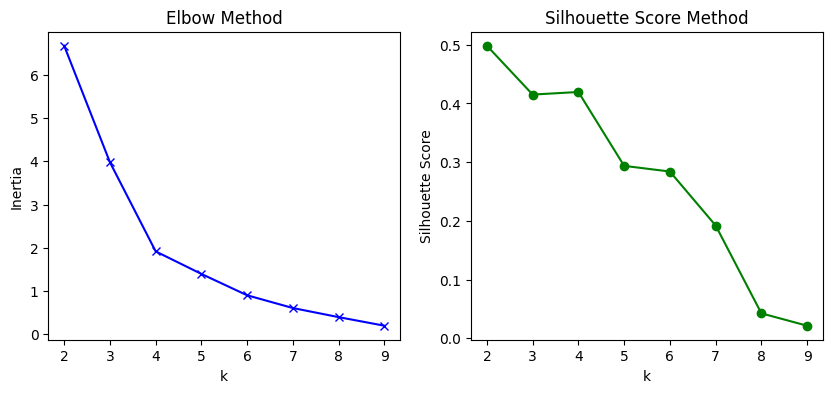

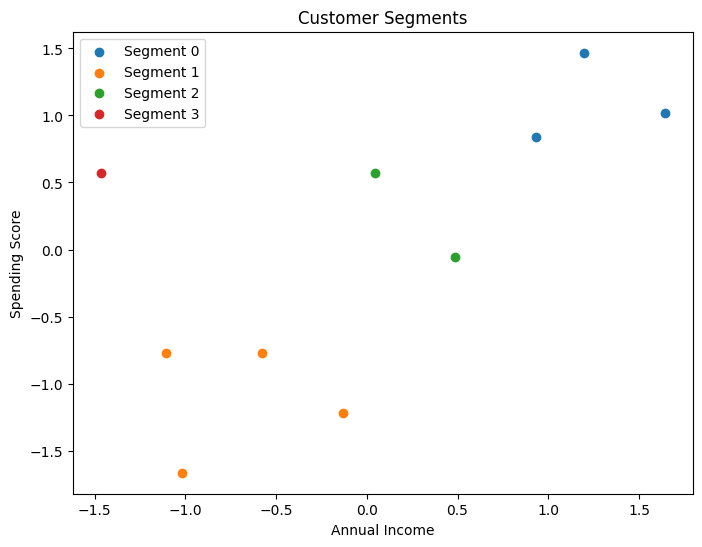

In [ ]:
# Plot Elbow and Silhouette Score to determine the best 'k'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

# Choose the optimal k (e.g., k=4 based on Elbow or Silhouette Score) and apply K-Means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['segment'] = kmeans.fit_predict(data[['annual_income', 'spending_score']])

# Visualizing Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(data.loc[data['segment'] == i, 'annual_income'], data.loc[data['segment'] == i, 'spending_score'], label=f'Segment {i}')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.show()




In [ ]:
# Step 3: Recommendation System using Collaborative Filtering
# Creating a pivot table for 'purchase_history' as a rating matrix
rating_matrix = data.pivot_table(index='customer_id', columns='segment', values='purchase_history').fillna(0)

# Fitting Nearest Neighbors for collaborative filtering
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(rating_matrix)

# Define a function to recommend similar customers
def recommend_customers(customer_id, n_recommendations=3):
    customer_index = rating_matrix.index.get_loc(customer_id)
    distances, indices = knn.kneighbors(rating_matrix.iloc[customer_index, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    similar_customers = [rating_matrix.index[i] for i in indices.flatten()][1:]
    return similar_customers


In [ ]:

# Testing recommendation function
test_customer_id = 1
recommended_customers = recommend_customers(test_customer_id)
print(f"Recommended customers for customer {test_customer_id}: {recommended_customers}")



Recommended customers for customer 1: [7, 9, 8]


In [ ]:
# Step 4: Summary of Segments and Recommendations
print("Customer Segments Summary:")
print(data.groupby('segment').mean())

print("\nRecommendation Results:")
for customer in data['customer_id'].unique():
    print(f"Recommendations for Customer {customer}: {recommend_customers(customer)}")

Customer Segments Summary:
         customer_id       age  annual_income  spending_score  \
segment                                                         
0           5.666667  1.267712       1.256841        1.109800   
1           4.500000 -0.756811      -0.709746       -1.105325   
2           9.500000  0.101756       0.266155        0.259550   
3           1.000000 -0.979403      -1.463850        0.572800   

         purchase_history  
segment                    
0                1.259483  
1               -0.426854  
2               -0.189713  
3               -1.691607  

Recommendation Results:
Recommendations for Customer 1: [7, 9, 8]
Recommendations for Customer 2: [10, 9, 7]
Recommendations for Customer 3: [8, 5, 9]
Recommendations for Customer 4: [6, 7, 8]
Recommendations for Customer 5: [8, 5, 9]
Recommendations for Customer 6: [6, 7, 8]
Recommendations for Customer 7: [6, 7, 8]
Recommendations for Customer 8: [8, 5, 9]
Recommendations for Customer 9: [10, 7, 8]
Recommend

In [ ]:
# Step 1: Load Data with Additional Attributes
# Sample data with additional features like 'loyalty_score' and 'average_order_value'
data = pd.DataFrame({
    'customer_id': range(1, 11),
    'customer_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jane'],
    'age': [23, 25, 31, 45, 22, 35, 42, 21, 33, 30],
    'annual_income': [15000, 30000, 25000, 50000, 20000, 45000, 42000, 19000, 37000, 32000],
    'spending_score': [75, 55, 60, 80, 50, 85, 78, 60, 68, 75],
    'purchase_history': [12, 23, 19, 34, 20, 33, 25, 18, 21, 22],
    'loyalty_score': [8, 5, 7, 9, 6, 8, 7, 4, 7, 6],
    'average_order_value': [100, 250, 200, 400, 150, 350, 330, 160, 300, 280]
})

In [ ]:
# Normalize relevant numerical columns
scaler = StandardScaler()
data[['age', 'annual_income', 'spending_score', 'purchase_history', 'loyalty_score', 'average_order_value']] = \
    scaler.fit_transform(data[['age', 'annual_income', 'spending_score', 'purchase_history', 'loyalty_score', 'average_order_value']])

# Step 2: Customer Segmentation with K-Means Clustering

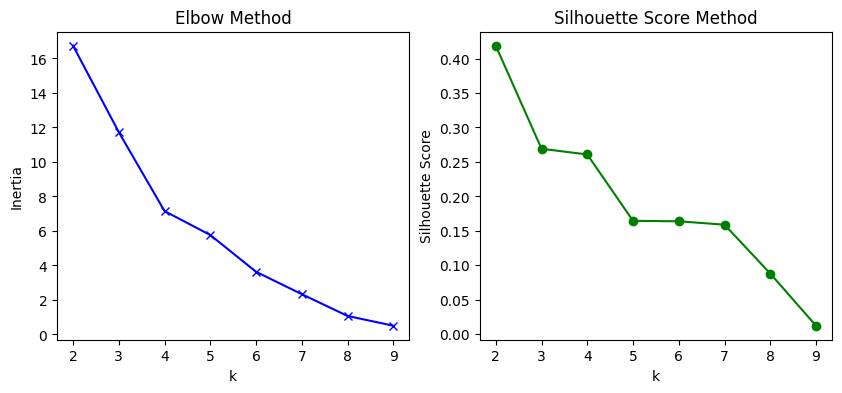

In [ ]:
# Step 2: Customer Segmentation with K-Means Clustering
# Finding the optimal number of clusters using the Elbow method
inertia = []
silhouette = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[['annual_income', 'spending_score', 'loyalty_score', 'average_order_value']])
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data[['annual_income', 'spending_score', 'loyalty_score', 'average_order_value']], kmeans.labels_))

# Plot Elbow and Silhouette Score to determine the best 'k'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


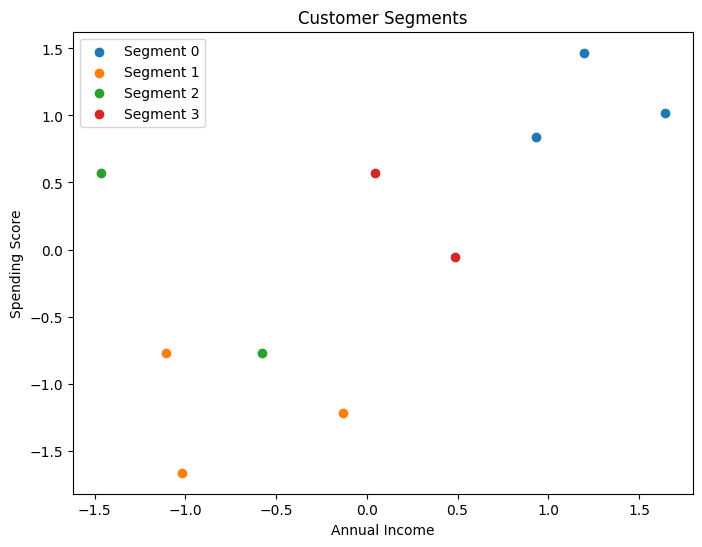

In [ ]:
# Choose the optimal k (e.g., k=4 based on Elbow or Silhouette Score) and apply K-Means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['segment'] = kmeans.fit_predict(data[['annual_income', 'spending_score', 'loyalty_score', 'average_order_value']])

# Visualizing Clusters with the first two features for simplicity
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(data.loc[data['segment'] == i, 'annual_income'], data.loc[data['segment'] == i, 'spending_score'], label=f'Segment {i}')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [ ]:
# Step 3: Recommendation System using Collaborative Filtering
# Creating a pivot table for 'purchase_history' as a rating matrix
rating_matrix = data.pivot_table(index='customer_id', columns='segment', values='purchase_history').fillna(0)

# Fitting Nearest Neighbors for collaborative filtering
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(rating_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Define a function to recommend similar customers
def recommend_customers(customer_id, n_recommendations=3):
    customer_index = rating_matrix.index.get_loc(customer_id)
    distances, indices = knn.kneighbors(rating_matrix.iloc[customer_index, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    similar_customers = [rating_matrix.index[i] for i in indices.flatten()][1:]
    similar_customer_names = data.loc[data['customer_id'].isin(similar_customers), 'customer_name'].values
    return similar_customer_names

# Testing recommendation function
test_customer_id = 1
recommended_customers = recommend_customers(test_customer_id)
print(f"Recommended customers for customer {test_customer_id} ({data.loc[data['customer_id'] == test_customer_id, 'customer_name'].values[0]}): {recommended_customers}")

# Step 4: Summary of Segments and Recommendations

# Select only numeric columns for calculating means by segment
numeric_data = data.select_dtypes(include=[np.number])

# Calculate and print the mean of each segment
print("Customer Segments Summary:")
print(numeric_data.groupby(data['segment']).mean())

print("\nRecommendation Results:")
for customer in data['customer_id'].unique():
    customer_name = data.loc[data['customer_id'] == customer, 'customer_name'].values[0]
    recommended_customers = recommend_customers(customer)
    print(f"Recommendations for Customer {customer} ({customer_name}): {recommended_customers}")

Recommended customers for customer 1 (Alice): ['Charlie' 'Grace' 'Ian']
Customer Segments Summary:
         customer_id       age  annual_income  spending_score  \
segment                                                         
0           5.666667  1.267712       1.256841         1.10980   
1           5.000000 -1.021801      -0.754105        -1.21720   
2           2.000000 -0.470622      -1.020259        -0.09845   
3           9.500000  0.101756       0.266155         0.25955   

         purchase_history  loyalty_score  average_order_value  segment  
segment                                                                 
0                1.259483       0.916949             1.168952      0.0  
1               -0.374156      -1.199088            -0.707144      1.0  
2               -1.138278       0.564276            -1.104010      2.0  
3               -0.189713      -0.141069             0.411298      3.0  

Recommendation Results:
Recommendations for Customer 1 (Alice): ['Charl